In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [125]:
data=pd.read_csv('/content/Heart Disease data.csv')

In [126]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [127]:
data.shape

(1025, 14)

In [128]:
data.size


14350

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [130]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [131]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [132]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [133]:
data.target.value_counts()

,count
target,
1,526
0,499


In [134]:
data[data.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [135]:
data.drop_duplicates(inplace=True)

In [136]:
data[data.duplicated()==True]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


<ipython-input-137-9e3a0b351272>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(age,ax=ax[0],color='green')
<ipython-input-137-9e3a0b351272>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sex,ax=ax[1],color='blue')


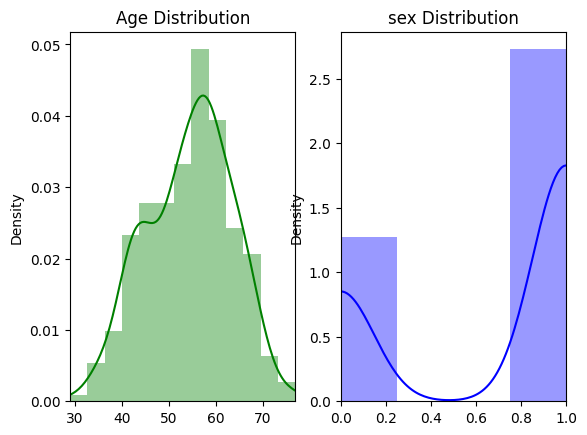

In [137]:
fig,ax=plt.subplots(1,2)
age=data['age'].values
sex=data['sex'].values
sns.distplot(age,ax=ax[0],color='green')
ax[0].set_title('Age Distribution')
ax[0].set_xlim([min(age),max(age)])
sns.distplot(sex,ax=ax[1],color='blue')
ax[1].set_title('sex Distribution')
ax[1].set_xlim([min(sex),max(sex)])

plt.show()

In [138]:
data.shape

(302, 14)

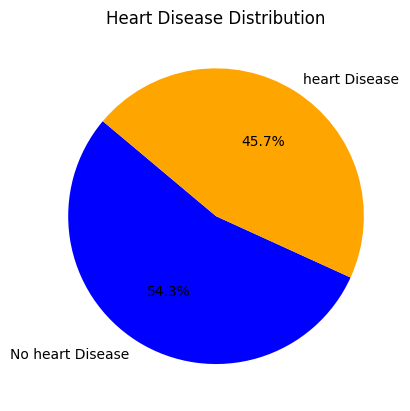

In [139]:
# Proportion of people with and without heart disease
heart_disease_count=data['target'].value_counts()
labels=['No heart Disease','heart Disease']
plt.pie(heart_disease_count,labels=labels,autopct='%1.1f%%',startangle=140,colors=['blue','orange'])
plt.title('Heart Disease Distribution')
plt.show()

<ipython-input-140-0ae7b244c260>:5: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:red'` for the same effect.

  sns.countplot(data=data, x='age_category', hue='sex', color='red')


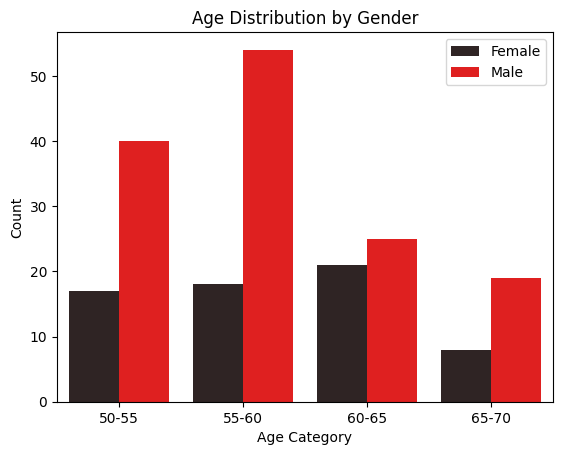

In [140]:

# Filter data by age groups
data['age_category'] = pd.cut(data['age'], bins=[50, 55, 60, 65, 70], labels=['50-55', '55-60', '60-65', '65-70'])

# Plotting age distribution by gender
sns.countplot(data=data, x='age_category', hue='sex', color='red')
plt.title('Age Distribution by Gender')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(['Female', 'Male'])
plt.show()

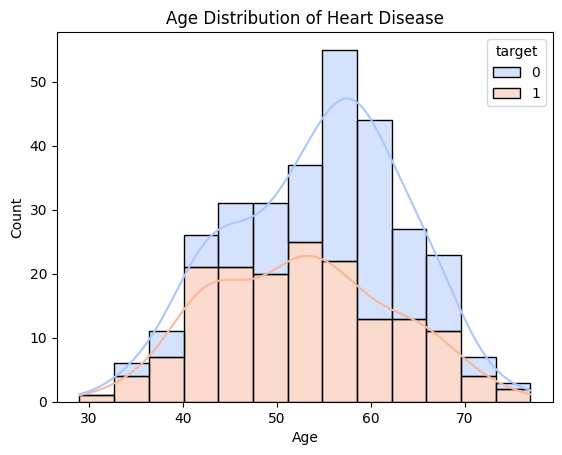

In [141]:
sns.histplot(data=data, x='age', hue='target', multiple='stack', kde=True, palette='coolwarm')
plt.title('Age Distribution of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

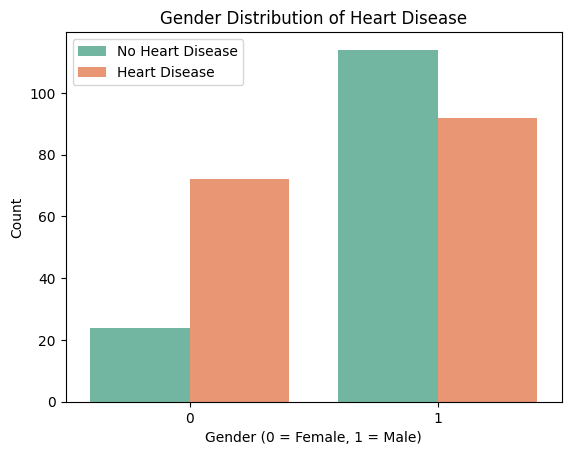

In [142]:
sns.countplot(data=data, x='sex', hue='target', palette='Set2')
plt.title('Gender Distribution of Heart Disease')
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

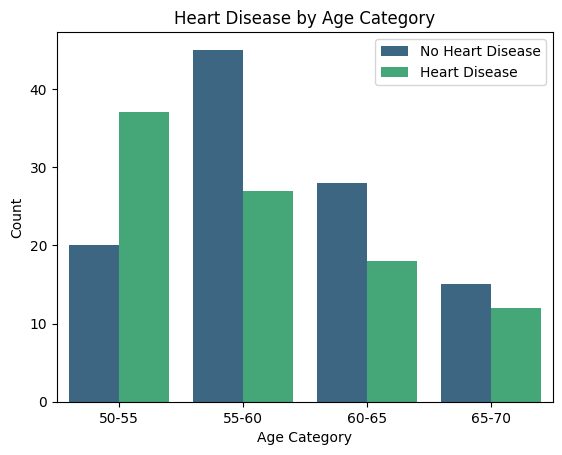

In [143]:
# Count of heart disease cases by age category
sns.countplot(data=data, x='age_category', hue='target', palette='viridis')
plt.title('Heart Disease by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

<ipython-input-144-244e5a03ca98>:2: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.countplot(data=data, x='cp', hue='target', color='purple')


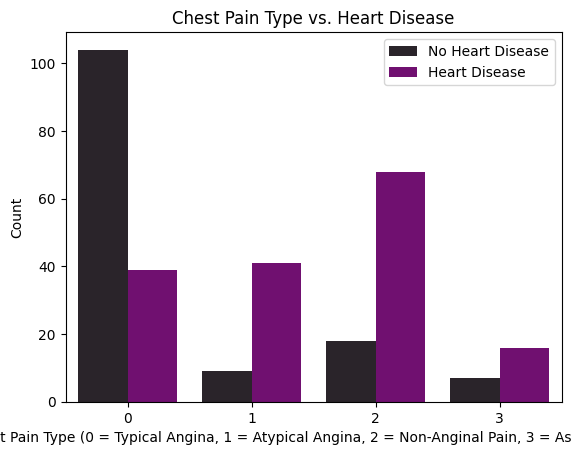

In [144]:
# Count of heart disease cases by chest pain type
sns.countplot(data=data, x='cp', hue='target', color='purple')
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type (0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal Pain, 3 = Asymptomatic)')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

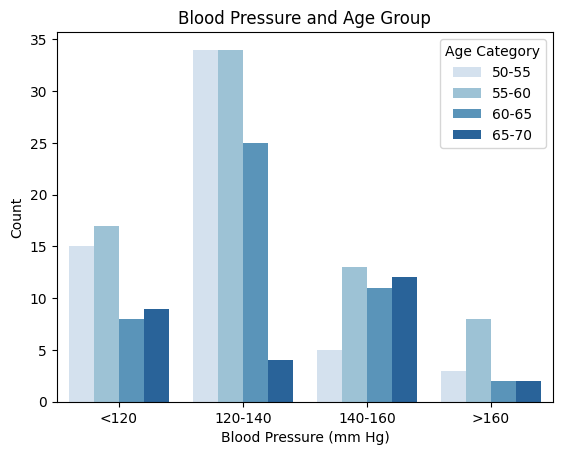

In [145]:
# Create blood pressure categories
data['bp_category'] = pd.cut(data['trestbps'], bins=[80, 120, 140, 160, 200], labels=['<120', '120-140', '140-160', '>160'])

# Count of heart disease cases by blood pressure category
sns.countplot(data=data, x='bp_category', hue='age_category', palette='Blues')
plt.title('Blood Pressure and Age Group')
plt.xlabel('Blood Pressure (mm Hg)')
plt.ylabel('Count')
plt.legend(title='Age Category')
plt.show()

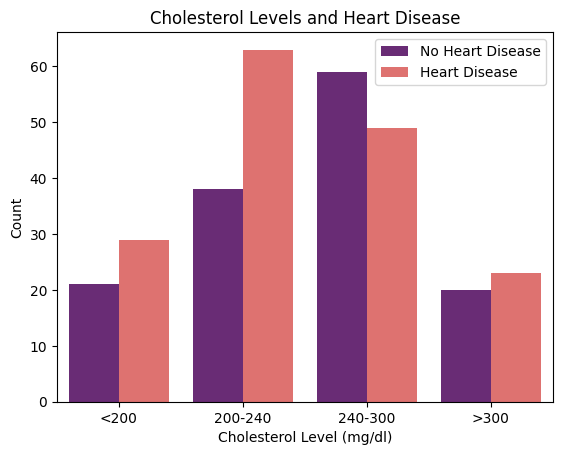

In [146]:
data['chol_category'] = pd.cut(data['chol'], bins=[0, 200, 240, 300, 600], labels=['<200', '200-240', '240-300', '>300'])

# Count of heart disease cases by cholesterol category
sns.countplot(data=data, x='chol_category', hue='target', palette='magma')
plt.title('Cholesterol Levels and Heart Disease')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

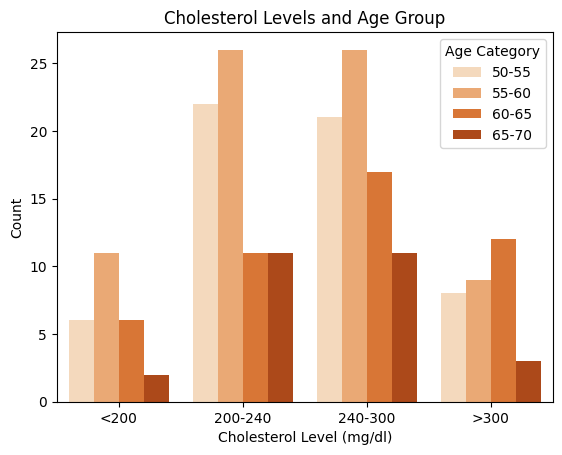

In [148]:
# Cholesterol count plot by age category
sns.countplot(data=data, x='chol_category', hue='age_category', palette='Oranges')
plt.title('Cholesterol Levels and Age Group')
plt.xlabel('Cholesterol Level (mg/dl)')
plt.ylabel('Count')
plt.legend(title='Age Category')
plt.show()



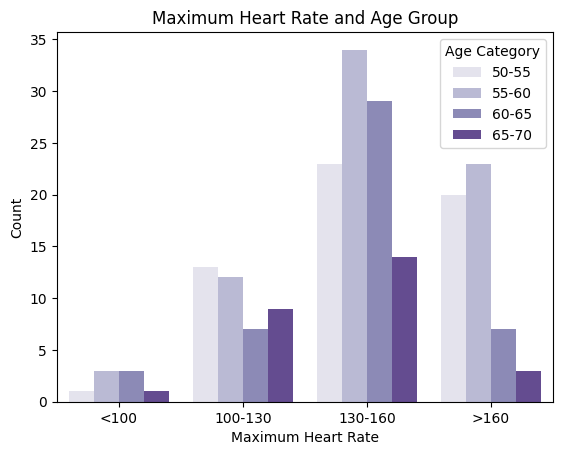

In [149]:
# Maximum heart rate categories
data['thalach_category'] = pd.cut(data['thalach'], bins=[70, 100, 130, 160, 200], labels=['<100', '100-130', '130-160', '>160'])

# Maximum heart rate count plot by age category
sns.countplot(data=data, x='thalach_category', hue='age_category', palette='Purples')
plt.title('Maximum Heart Rate and Age Group')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Count')
plt.legend(title='Age Category')
plt.show()

<ipython-input-152-70ed890175f0>:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:purple'` for the same effect.

  sns.countplot(data=data, x='oldpeak_category', hue='target', color='purple')


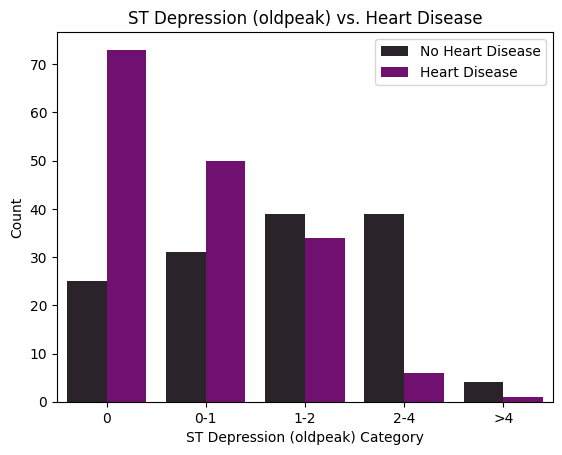

In [152]:
data['oldpeak_category'] = pd.cut(data['oldpeak'], bins=[-1, 0, 1, 2, 4, 7], labels=['0', '0-1', '1-2', '2-4', '>4'])

# Count of heart disease cases by ST depression category
sns.countplot(data=data, x='oldpeak_category', hue='target', color='purple')
plt.title('ST Depression (oldpeak) vs. Heart Disease')
plt.xlabel('ST Depression (oldpeak) Category')
plt.ylabel('Count')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.show()

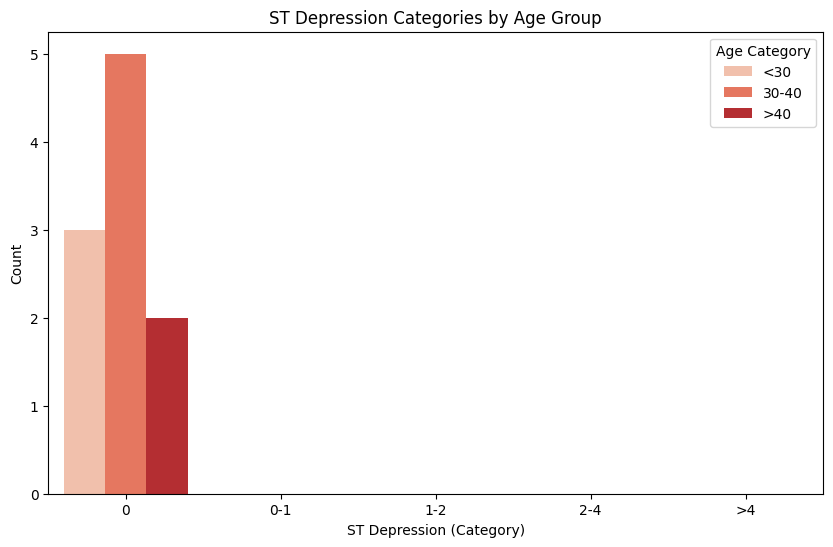

In [156]:

data = {
    'Age': [25, 35, 45, 30, 50, 33, 40, 29, 37, 32],
    'ST_Depression': [-0.1, -0.2, -0.4, -0.3, -0.1, -0.5, -0.2, -0.1, -0.3, -0.4]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Create age category for the age group 30-40
df['Age_Category'] = pd.cut(df['Age'], bins=[0, 30, 40, 100], labels=['<30', '30-40', '>40'])

# Create ST depression categories
df['ST_Depression_Category'] = pd.cut(df['ST_Depression'], bins=[-1, 0, 1, 2, 4, 7], labels=['0', '0-1', '1-2', '2-4', '>4'])

# Plot ST Depression categories by Age category
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ST_Depression_Category', hue='Age_Category', palette='Reds')
plt.title('ST Depression Categories by Age Group')
plt.xlabel('ST Depression (Category)')
plt.ylabel('Count')
plt.legend(title='Age Category')
plt.show()
